# Preparación de los Datos

##Importando los datos

In [1]:
# Manipulación de datos
import pandas as pd
# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
datos = pd.read_csv('/content/datos_tratados.csv')

In [3]:
datos.head()

,CustomerID,Churn,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,ChargesDaily,ChargesMonthly,ChargesTotal
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.9,267.40


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   Gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   Tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [5]:
datos.shape

(7043, 22)

## Eliminar columnas sin valor predictivo

In [6]:
# Eliminamos el ID del cliente
datos = datos.drop(columns=['CustomerID'])


## Transformar la variable objetivo (Churn)

In [7]:
# Convertimos la variable objetivo a binaria
datos['Churn'] = datos['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

## Codificación de variables categóricas (One-Hot Encoding)

In [8]:
# Identificamos variables categóricas
categorical_cols = datos.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [9]:
df_encoded = pd.get_dummies(datos, columns=categorical_cols, drop_first=True)

In [10]:
df_encoded.head()

,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal,Gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,2.19,65.6,593.30,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,2.00,59.9,542.40,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,4,2.46,73.9,280.85,True,False,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,3.27,98.0,1237.85,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,2.80,83.9,267.40,False,True,True,False,True,...,False,True,True,False,False,False,True,False,False,True


In [11]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   Tenure                                 7043 non-null   int64  
 2   ChargesDaily                           7043 non-null   float64
 3   ChargesMonthly                         7043 non-null   float64
 4   ChargesTotal                           7043 non-null   float64
 5   Gender_Male                            7043 non-null   bool   
 6   SeniorCitizen_Yes                      7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

## Análisis de desbalance de clases

In [12]:
# Distribución de la variable objetivo
df_encoded["Churn"].value_counts()

,count
Churn,
0,5174
1,1869


In [13]:
# Proporciones
df_encoded["Churn"].value_counts(normalize=True)*100


,proportion
Churn,
0,73.463013
1,26.536987


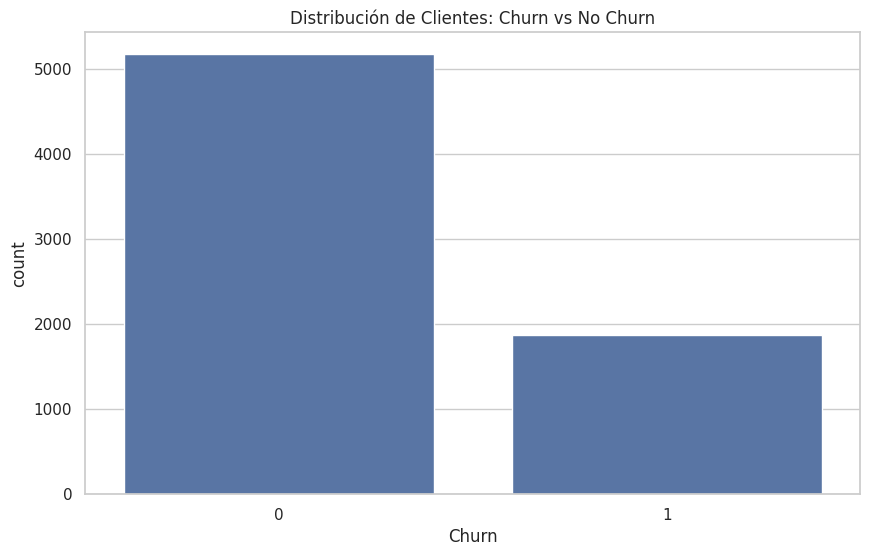

In [14]:
sns.countplot(x="Churn", data=df_encoded)
plt.title("Distribución de Clientes: Churn vs No Churn")
plt.show()

# Correlación y Selección de Variables

## Separar variables numéricas para correlación

In [15]:
numeric_cols = [
    "Churn",
    "Tenure",
    "ChargesDaily",
    "ChargesMonthly",
    "ChargesTotal"
]

df_numeric = df_encoded[numeric_cols]

## calcular la matriz de correlación

In [16]:
corr_matrix = df_numeric.corr()
corr_matrix

,Churn,Tenure,ChargesDaily,ChargesMonthly,ChargesTotal
Churn,1.000000,-0.352229,0.193412,0.193356,-0.198324
Tenure,-0.352229,1.000000,0.247910,0.247900,0.826178
ChargesDaily,0.193412,0.247910,1.000000,0.999996,0.651189
ChargesMonthly,0.193356,0.247900,0.999996,1.000000,0.651174
ChargesTotal,-0.198324,0.826178,0.651189,0.651174,1.000000


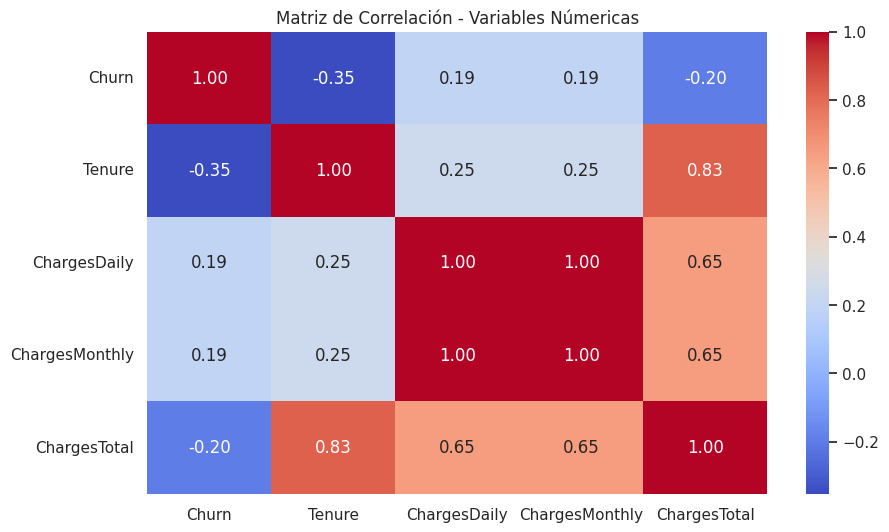

In [17]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - Variables Númericas")
plt.show()

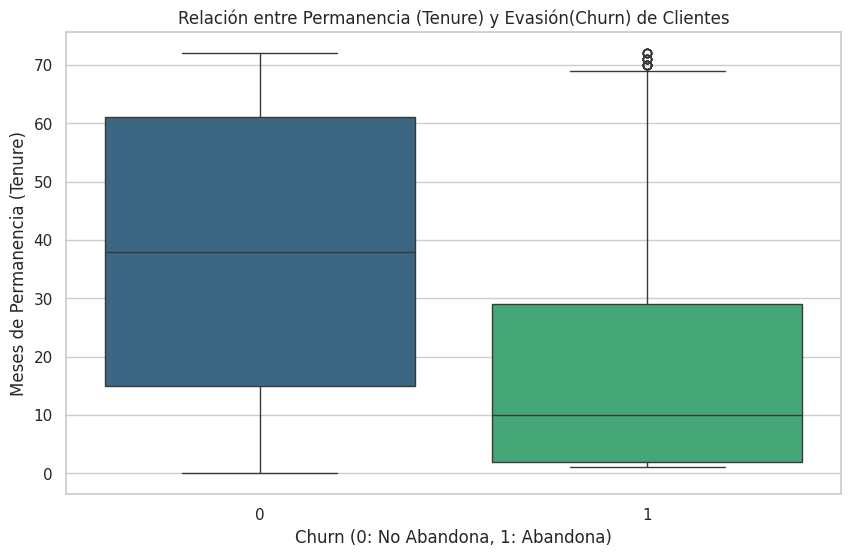

In [18]:
sns.boxplot(x='Churn', y='Tenure', data=df_encoded, palette='viridis', hue='Churn', legend=False)
plt.title("Relación entre Permanencia (Tenure) y Evasión(Churn) de Clientes")
plt.xlabel('Churn (0: No Abandona, 1: Abandona)')
plt.ylabel('Meses de Permanencia (Tenure)')
plt.show()

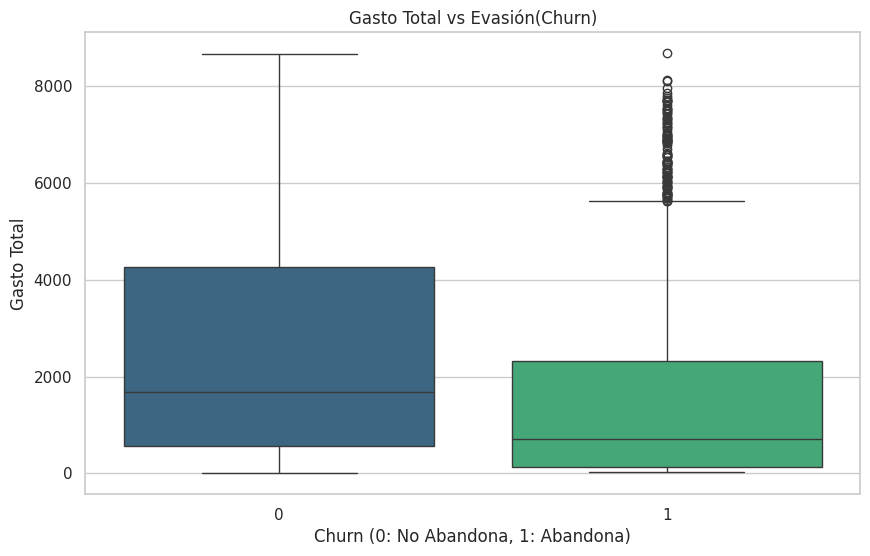

In [19]:
sns.boxplot(x='Churn', y='ChargesTotal', data=df_encoded, palette='viridis', hue='Churn', legend=False)
plt.title("Gasto Total vs Evasión(Churn)")
plt.xlabel('Churn (0: No Abandona, 1: Abandona)')
plt.ylabel('Gasto Total')
plt.show()

#MODELADO PREDICTIVO

## Separación de Datos

In [20]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

## División en entrenamiento y prueba

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=42)

## Modelo 1 – Regresión Logística (con normalización)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [23]:
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

In [24]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
y_pred_log = logistic_pipeline.predict(X_test)
print(f'Exactitud del modelo: {accuracy_score(y_test, y_pred_log)}')
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred_log))

Exactitud del modelo: 0.7927608232789212

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



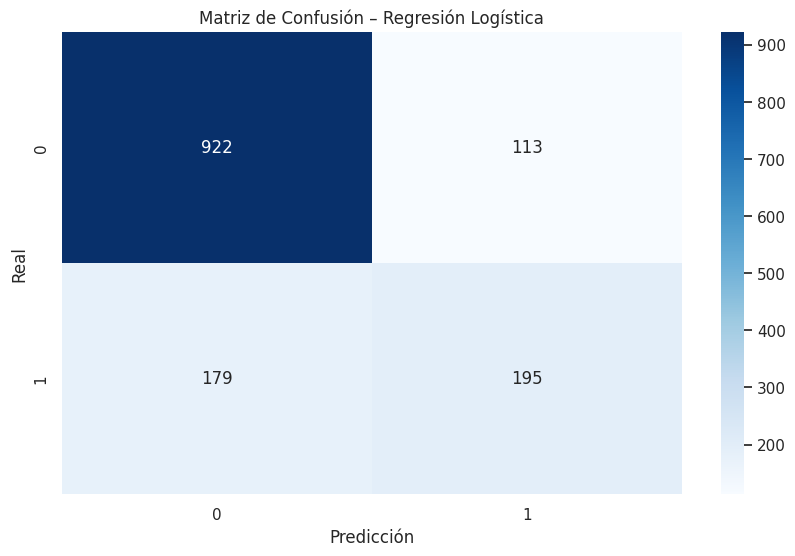

In [27]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_log),
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.title("Matriz de Confusión – Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


## Modelo 2

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
    )


In [30]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [31]:
y_pred_rf = rf_model.predict(X_test)

print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n")
print(classification_report(y_test, y_pred_rf))


Exactitud: 0.7934705464868701

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



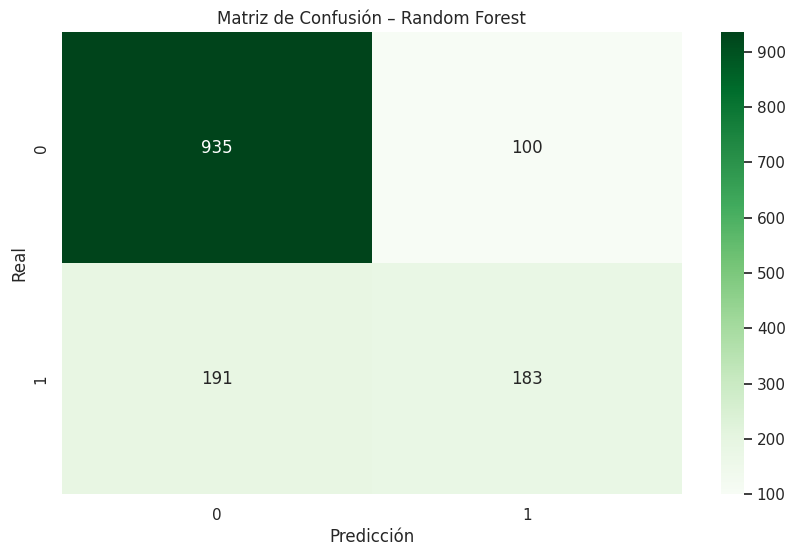

In [32]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt="d",
    cmap="Greens"
)

plt.title("Matriz de Confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


# Regresión Logística + Balanceo (SMOTE) + Validación Cruzada + Ajuste de Umbral

In [33]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [34]:
smote_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=1000))
])

In [35]:
cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_recall = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='recall')
cv_f1 = cross_val_score(smote_pipeline, X_train, y_train, cv=cv, scoring='f1')

In [36]:
print(f'Recall CV promedio: {cv_recall.mean()}')
print(f'F1 CV promedio: {cv_f1.mean()}')

Recall CV promedio: 0.7919732441471572
F1 CV promedio: 0.6279192505898918


In [37]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('model', LogisticRegression(max_iter=1000))])

In [38]:
y_probabilidad = smote_pipeline.predict_proba(X_test)[:, 1]

In [41]:
threshold = 0.35
y_pred_adjusted = (y_probabilidad >= threshold).astype(int)


In [42]:
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.94      0.60      0.73      1035
           1       0.45      0.89      0.60       374

    accuracy                           0.68      1409
   macro avg       0.69      0.75      0.66      1409
weighted avg       0.81      0.68      0.70      1409



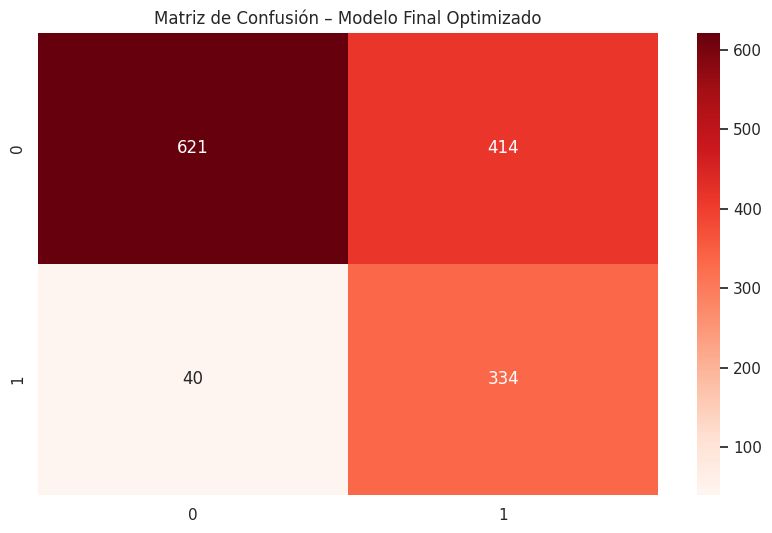

In [43]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_adjusted),
    annot=True,
    fmt="d",
    cmap="Reds"
)

plt.title("Matriz de Confusión – Modelo Final Optimizado")
plt.show()


# Análisis de Variables Relevantes (Regresión Logística)

In [48]:
# Extraer el modelo de regresión logística del pipeline
log_reg = smote_pipeline.named_steps['model']

# Obtener coeficientes
coeficientes = log_reg.coef_[0]

# Obtener nombres de las variables
feature_names = X.columns

# Crear DataFrame con resultados
feature_importance = pd.DataFrame({
    "Variable": feature_names,
    "Coeficiente": coeficientes
})

# Ordenar por impacto
feature_importance = feature_importance.sort_values(by="Coeficiente", ascending=False)

feature_importance.head(10)

,Variable,Coeficiente
3,ChargesTotal,0.892001
10,InternetService_Fiber optic,0.753928
16,StreamingTV_Yes,0.265300
17,StreamingMovies_Yes,0.234562
20,PaperlessBilling_Yes,0.228452
9,MultipleLines_Yes,0.220730
22,PaymentMethod_Electronic check,0.217822
14,DeviceProtection_Yes,0.067097
5,SeniorCitizen_Yes,0.053268
23,PaymentMethod_Mailed check,0.035774


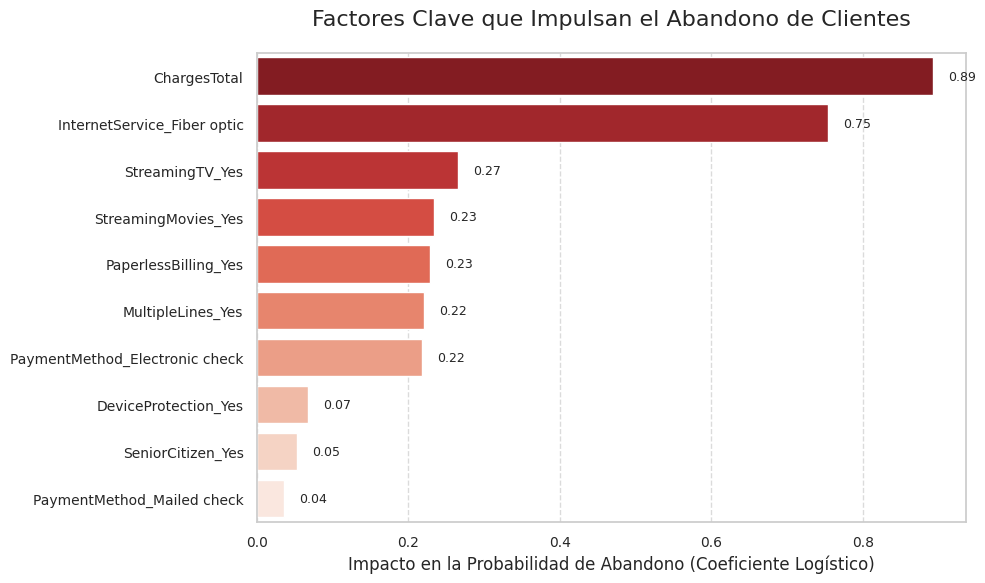

In [62]:
# Top 10 variables que MÁS aumentan el churn
top_positive = feature_importance.head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Coeficiente", y="Variable", data=top_positive, palette="Reds_r", hue="Variable", legend=False)
plt.title("Factores Clave que Impulsan el Abandono de Clientes", fontsize=16, pad=20)
plt.xlabel("Impacto en la Probabilidad de Abandono (Coeficiente Logístico)", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02, p.get_y() + p.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

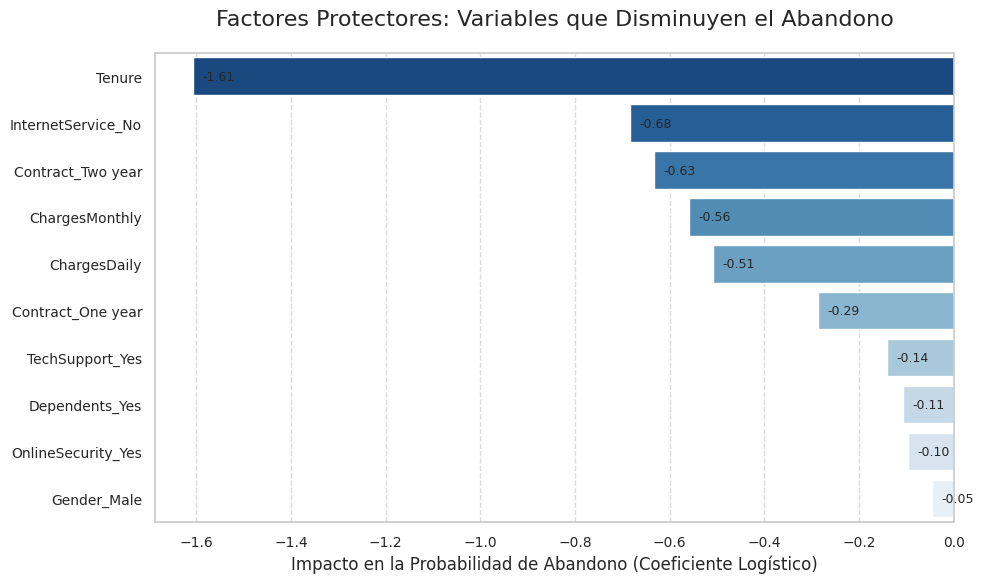

In [64]:
# Top 10 variables que MÁS reducen el churn
top_negative = feature_importance.tail(10).sort_values(by="Coeficiente", ascending=True)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x="Coeficiente", y="Variable", data=top_negative, palette="Blues_r", hue="Variable", legend=False)
plt.title("Factores Protectores: Variables que Disminuyen el Abandono", fontsize=16, pad=20)
plt.xlabel("Impacto en la Probabilidad de Abandono (Coeficiente Logístico)", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)


for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.02, p.get_y() + p.get_height() / 2,
             f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

#Informe Final: Análisis de Cancelación de Clientes (Churn)

##Objetivo del Análisis

El objetivo fue desarrollar un modelo predictivo capaz de identificar clientes con alta probabilidad de cancelación (churn), y posteriormente analizar los factores más influyentes en dicha decisión para proponer estrategias de retención basadas en datos.

##Evaluación del Rendimiento de los Modelos

Se entrenaron distintos modelos de clasificación, priorizando la detección de clientes que cancelan (clase 1).

Modelo 1 inicial

Accuracy ≈ 79%

Recall churn ≈ 52%

Problema: Muchos falsos negativos (clientes que cancelaban y el modelo no detectaba).

Modelo 2 optimizado (con balanceo y ajuste de umbral)

Recall churn ≈ 89%

Falsos negativos reducidos drásticamente

Se priorizó la detección temprana del churn por sobre la accuracy general

Decisión estratégica:

En problemas de churn es más costoso no detectar un cliente que va a cancelar que contactar a uno que finalmente no cancela.

Por eso se optimizó el modelo priorizando recall sobre accuracy.

##Variables Más Influyentes en la Cancelación
A partir del análisis de coeficientes de la Regresión Logística, se identificaron los factores con mayor impacto.

###Factores que AUMENTAN la probabilidad de cancelación
1. ChargesTotal

    Clientes con mayor gasto acumulado presentan mayor probabilidad de churn.

    Interpretación:
    Posible percepción de alto costo o baja relación costo-beneficio.

2. InternetService_Fiber optic

    Clientes con fibra óptica muestran mayor riesgo.

    Interpretación:
    Segmento premium con mayores expectativas y sensibilidad ante fallas.

3. Servicios adicionales (StreamingTV, StreamingMovies)

    Los paquetes adicionales incrementan el riesgo.

    Interpretación:
    Mayor precio mensual puede generar abandono si el valor percibido no es suficiente.

4. PaymentMethod_Electronic check

    Método de pago asociado históricamente a mayor churn.

###Factores que REDUCEN la probabilidad de cancelación

1. Tenure (Antigüedad del cliente)

    Es el factor más protector.

    Cuanto más tiempo permanece el cliente, menor es la probabilidad de cancelación.

    Conclusión:
    Los primeros meses son críticos.

2. Contract_Two year

    Contratos de largo plazo reducen significativamente el churn.

3. Contract_One year

    También reduce churn, aunque menos que el de dos años.

4. TechSupport_Yes y OnlineSecurity_Yes

    Servicios de valor agregado reducen la cancelación.

    Interpretación:
    Cuando el cliente percibe beneficios adicionales, aumenta la retención.

###Principales Factores que Afectan la Cancelación
De forma consolidada, los factores más determinantes son:

1. Baja antigüedad (clientes nuevos)

2. Ausencia de contrato a largo plazo

3. Alto gasto acumulado

4. Servicios premium (fibra óptica)

5. Falta de servicios de soporte o seguridad

## Estrategias de Retención Propuestas

Basadas en los hallazgos del modelo:

**Estrategia 1: Programa de Retención Temprana**

Dado que la antigüedad es el principal factor protector:

* Seguimiento activo durante los primeros 3 meses

* Contacto personalizado

* Ofertas de bienvenida

* Encuestas de satisfacción tempranas

**Estrategia 2:Incentivar Contratos de Largo Plazo**

Dado que los contratos anuales reducen churn:

* Descuento por contrato de 1 o 2 años

* Beneficios exclusivos por permanencia

* Upgrade gratuito por fidelidad

**Estrategia 3:** Gestión del Segmento Premium (Fibra Óptica)

* Soporte técnico prioritario

* SLA (Service Level Agreement o Acuerdo de Nivel de Servicio) más estricto

* Programa VIP para clientes de alto valor

**Estrategia 4: Ofrecer Servicios de Valor Agregado**

Clientes con soporte técnico y seguridad cancelan menos.

* Bundles promocionales

* Prueba gratuita de servicios adicionales

* Upgrade automático con descuento

# Conclusión General

El análisis demuestra que el churn no depende de un único factor, sino de una combinación de:

* Tiempo de permanencia

* Tipo de contrato

* Nivel de gasto

* Servicios contratados

El modelo predictivo desarrollado permite identificar clientes con alto riesgo y aplicar estrategias preventivas antes de que se produzca la cancelación.

Más allá de la métrica de accuracy, el modelo fue optimizado estratégicamente para minimizar la pérdida de clientes, priorizando la detección temprana del churn.